# **GROUP 24: PYTHON ANALYTICS ON CALIFORNIA HOUSE PRICES**

:
# CALIFORNIA HOUSE PRICES
In this report, we will delve into the fascinating realm of housing in the Golden State using the California House Pricing dataset.

California is renowned not only for its diverse landscapes but also for its dynamic and ever-evolving real estate market. We will embark on unraveling the intricacies of this market by employing data analysis, visualization, and machine-learning techniques.

---
# OBJECTIVE
Our Python project aims to leverage this data and answer questions such as “What drives housing prices in different regions?”, “How do different features correlate?”, and “How can we predict house values accurately?”, etc.

**About this data**

The dataset we will be using has the following variables:
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea


# Step 0: Importing libraries and loading dataframe


Here, we insert different basic libaries needed for this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

Then we load the csv file housing.csv into our notebook.






In [ ]:
df = pd.read_csv("/content/housing.csv")

# Step 1: Overall data exploration

We start with a simple command: *df*, which allows us to see the general layout of the dataframe.

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As you can see, most features have 20,640 non-null values but the total_bedrooms has some values missing, which is a problem. To resolve this, we drop these NaN (not a number) entries by performing *data.dropna(inplace=True)*. This will return a data frame with only non-null values. Then, we save it and apply it which takes the data drops the nan values and saves the result in the data object again.

When we perform *data.info* again, we see the same number of non-null values in all the different features.


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


After that, we  split the data intro training and testing data: X and Y data. This is an important part because we want to train them all on on set of the data and we want to evaluate it on another set. By doing this, we will not work with all of the data because we need to have some spare data that the model has never seen before to see if it performs well on this data. For this data, we have the results for all the values but the model does not have the results.

In [ ]:
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Then, we join again the X training data into Y training data, so that we can analyze some basic correlations.


In [ ]:
train_data = X_train.join(y_train)

We have this combined data frame but only for the training data.


In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18890,-122.23,38.12,49.0,2715.0,435.0,1006.0,429.0,4.2308,NEAR BAY,145800.0
8458,-118.36,33.91,36.0,2064.0,474.0,1366.0,421.0,4.1000,<1H OCEAN,243100.0
6770,-118.15,34.11,52.0,2375.0,369.0,930.0,351.0,7.4111,<1H OCEAN,469100.0
14896,-117.07,32.60,18.0,2602.0,551.0,1042.0,550.0,1.9267,NEAR OCEAN,67500.0
3461,-118.45,34.32,23.0,3481.0,641.0,1952.0,682.0,4.2600,<1H OCEAN,189400.0
...,...,...,...,...,...,...,...,...,...,...
1594,-122.12,37.91,34.0,5683.0,755.0,1962.0,723.0,8.3678,NEAR BAY,455300.0
7039,-118.09,33.95,32.0,1083.0,206.0,737.0,218.0,3.5583,<1H OCEAN,170800.0
13221,-117.71,34.02,17.0,12689.0,2426.0,7343.0,2230.0,3.6361,INLAND,157700.0
17886,-121.96,37.39,20.0,1032.0,229.0,658.0,238.0,4.5062,<1H OCEAN,219300.0



Now, we can do some basic exploration of the numeric features such as multiple histograms with distribution and correlation with the target variable.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

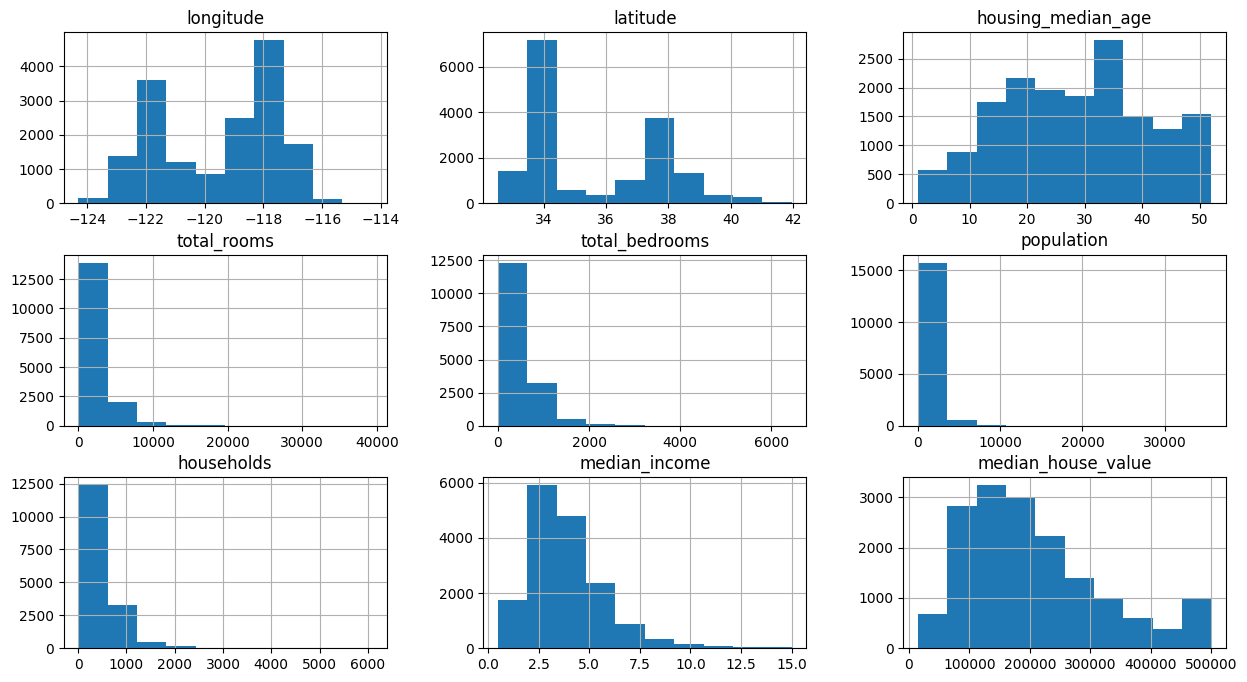

In [ ]:
train_data.hist(figsize=(15, 8))

We can also draw a heatmap to visualize the correlation. As you can see, for example, the latitude has a negative correlation with the house value at -0.14.


<ipython-input-96-47c412345701>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="PiYG")


<Axes: >

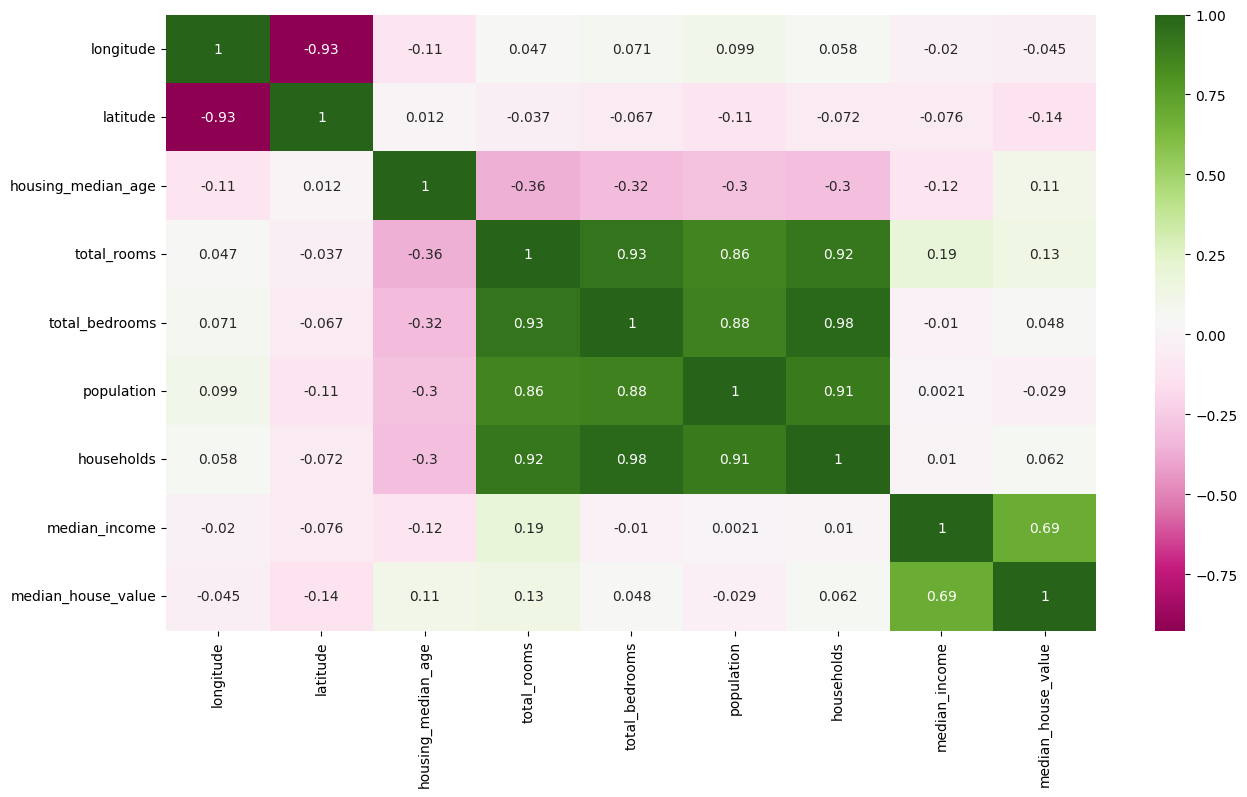

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="PiYG")

# Step 2: Data processing and cleaning

Looking at the histograms above, we can observe that the data is not illustrated in a bell shape. To remedy this, we observe the same histogram but with the logaric value of each valuable. This time, patterns of the bell shape emerge.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

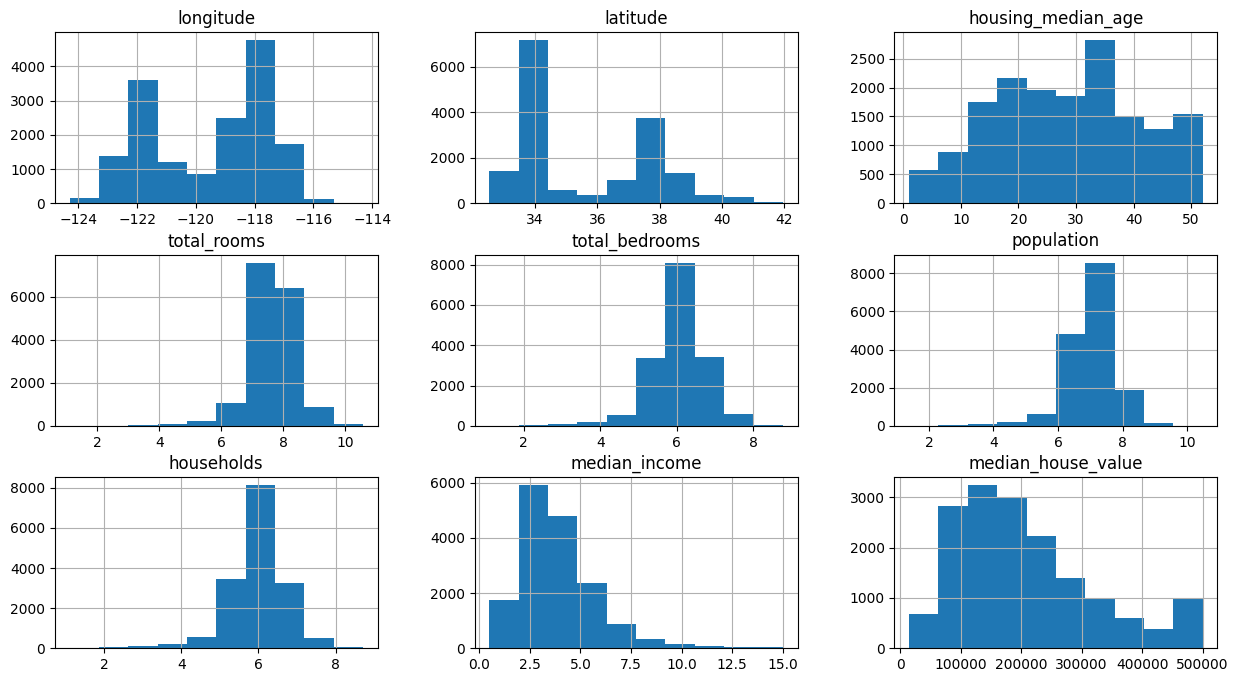

In [ ]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

train_data.hist(figsize=(15, 8))

Next, we will attempt to clean some parts of the dataset, specifically the variable *ocean_proximity*. To analyze the correlation of this variable with the others, we need to convert the variable to binary forms of each possible value of the variable. We do this by using the function *pd.get_dummies()*.

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7262
INLAND        5172
NEAR OCEAN    2103
NEAR BAY      1805
ISLAND           4
Name: ocean_proximity, dtype: int64

The “train_data” in the “ocean_proxomity” column is expressed in text with values such as “Near bay”, “<1H ocean” or near ocean/inland/ island. So below we will convert the ocean_proximity column into numerical numbers. First we run the code to count the number of each category with <1H ocean has 7262 value counts, inland counts 5172, near ocean stands for 2103 value counts, near bay is 1805 counts and last is island with 4 value counts.

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18890,-122.23,38.12,49.0,7.906915,6.077642,6.914731,6.063785,4.2308,145800.0,0,0,0,1,0
8458,-118.36,33.91,36.0,7.632886,6.163315,7.220374,6.045005,4.1000,243100.0,1,0,0,0,0
6770,-118.15,34.11,52.0,7.773174,5.913503,6.836259,5.863631,7.4111,469100.0,1,0,0,0,0
14896,-117.07,32.60,18.0,7.864420,6.313548,6.949856,6.311735,1.9267,67500.0,0,0,0,0,1
3461,-118.45,34.32,23.0,8.155362,6.464588,7.577122,6.526495,4.2600,189400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-122.12,37.91,34.0,8.645410,6.628041,7.582229,6.584791,8.3678,455300.0,0,0,0,1,0
7039,-118.09,33.95,32.0,6.988413,5.332719,6.603944,5.389072,3.5583,170800.0,1,0,0,0,0
13221,-117.71,34.02,17.0,9.448570,7.794411,8.901639,7.710205,3.6361,157700.0,0,1,0,0,0
17886,-121.96,37.39,20.0,6.940222,5.438079,6.490724,5.476464,4.5062,219300.0,1,0,0,0,0


So we have these categories here. And we will put these values into a table as numbers. Instead of just taking them and assigning numbers to them, we're going to create a new feature for every single category and we're going to give this a value of 1 or 0. This feature can either be yes or no, it is a feature representing if the location is less than 1 hour away from the ocean, near bay or island, etc. Yes would be 1, zero must be no.

<Axes: >

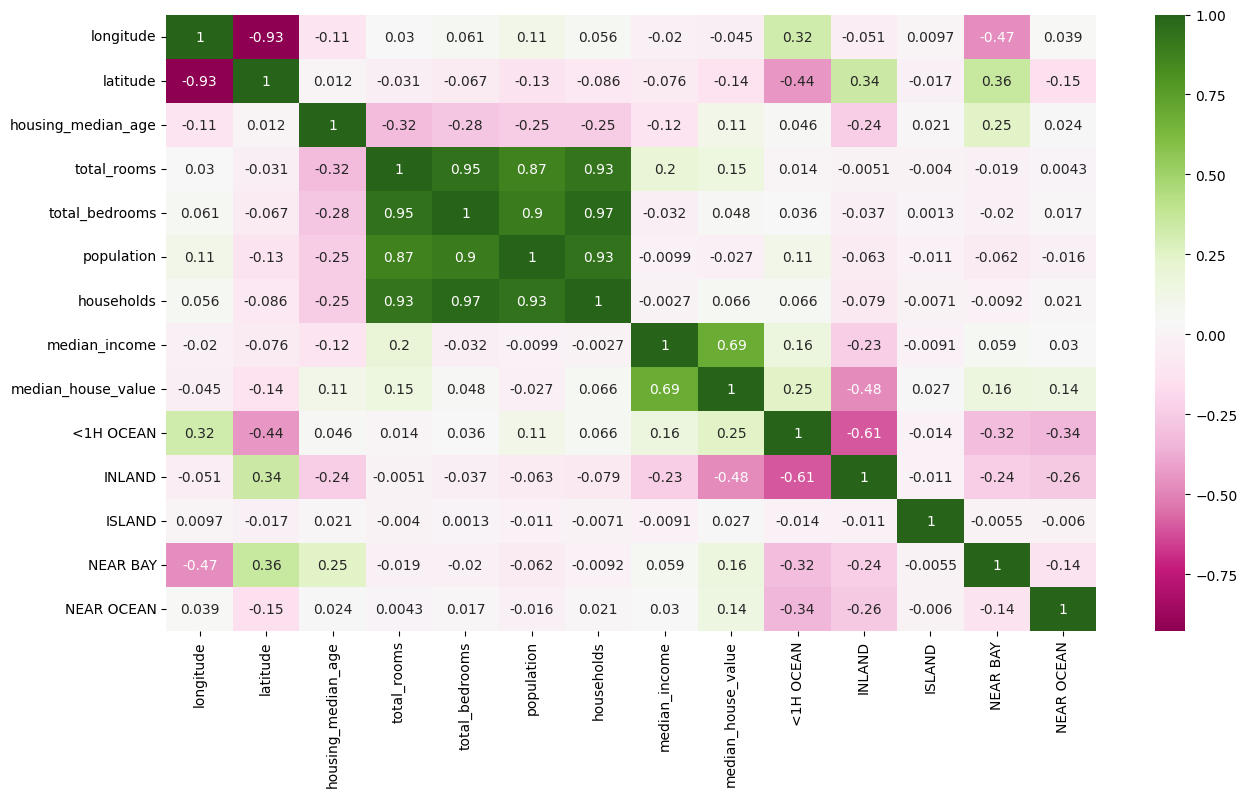

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="PiYG")

Now we can actually look at the correlation between the value above, so we can take the heatmap and do it again to see how these feature correlates with a target variable

For example, you can see that at Median house value, we have the negative correlation with Inland so if you’re in Inland you pay less for your house or the median price in the block is way  lower than if it’s not Inland, the same or the opposite is true for less than 1 hour away from the ocean. This is usually a higher price so we now have a bunch of more useful features.

<Axes: xlabel='latitude', ylabel='longitude'>

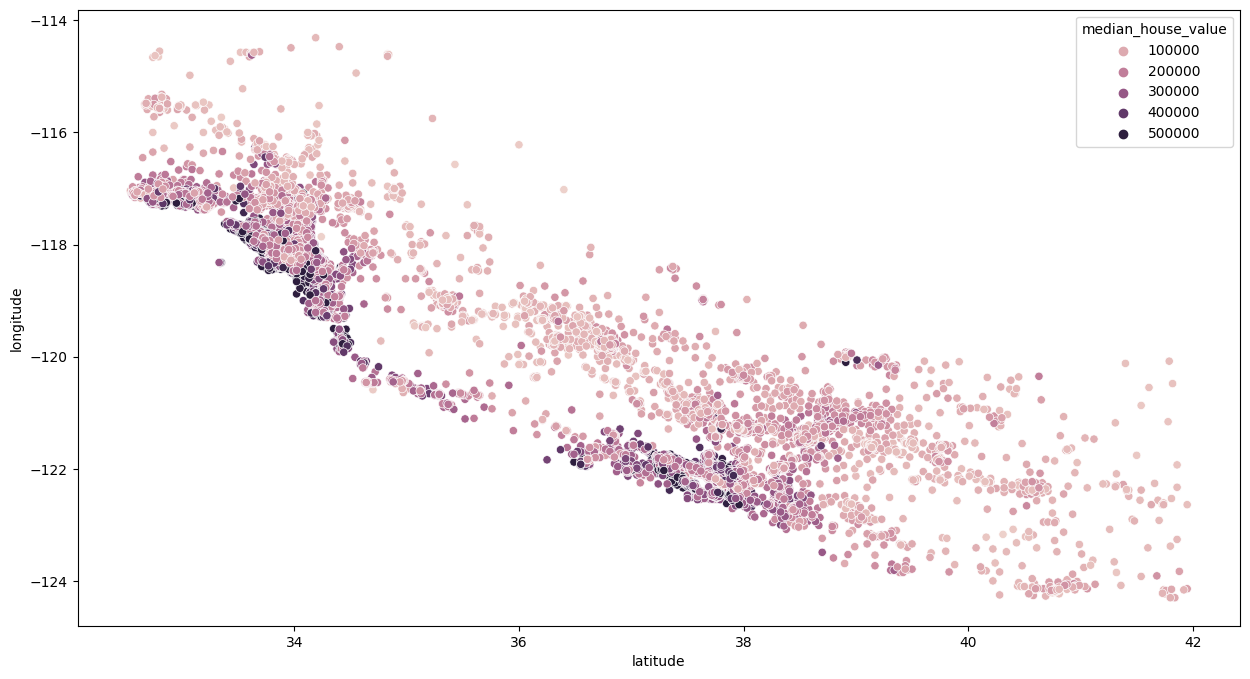

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value")

 We just want to see how the proximity and how the position of the individual block influences the prices. We are going to say scatter plot, the x coordinate is going to be latitude, the y coordinate is going to be longitude. The data itself idd the train data and the color is quite interesting, the color will be set now to our Target variable which is the median house value, the palette is going to be coolwarm. As we see, at the median house value, the more red it gets, the more expensive the houses and the more blue it is, the less expensive the houses. As we can see here even though it is note a map of California now , the slope downward here will be the coast so the horizontal line will be the sea so we would have the Inland basically as you can see that all the houses on that coast close to the ocean, close to the water are more expensive.  

In [ ]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

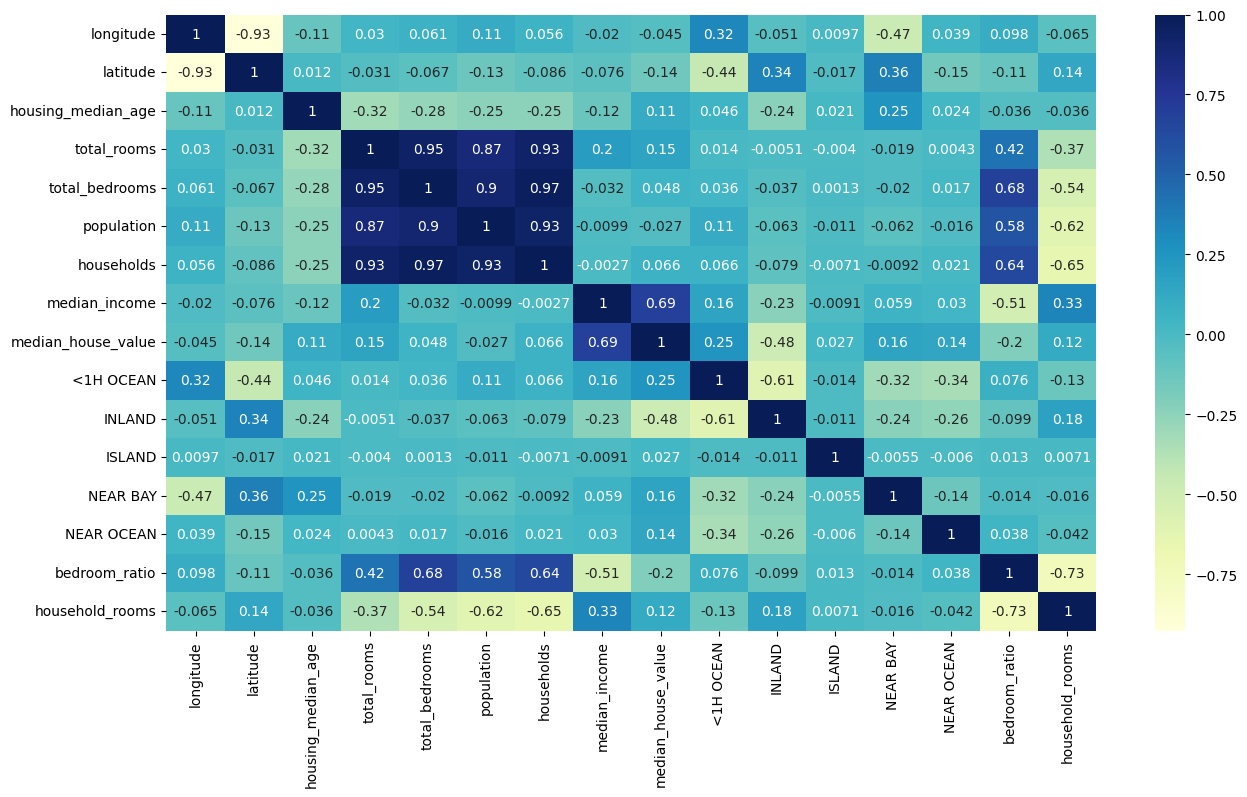

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Compared with the heatmap above, we've added more interest and variety to the chocasi figures by adding two variables "bedroom_ratio" and "household_rooms". Where "bedroom_ratio" will be the ratio of "total_bedrooms" to "total_rooms" and "household_rooms" will be the ratio of "total_rooms" in the family family "household". Thereby we can see that "bedroom_ratio" has a negative correlation compared to "household_rooms" which is -0.73.

# Step 3: Traditional analysis

In [ ]:
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

Firstly, we create our training data set by calling
```
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
```
Then, we call reg = LinearRegression() and we use the training data set we've just created to train the regression model.

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18890,-122.23,38.12,49.0,7.906915,6.077642,6.914731,6.063785,4.2308,0,0,0,1,0,0.768649,1.303957
8458,-118.36,33.91,36.0,7.632886,6.163315,7.220374,6.045005,4.1000,1,0,0,0,0,0.807469,1.262676
6770,-118.15,34.11,52.0,7.773174,5.913503,6.836259,5.863631,7.4111,1,0,0,0,0,0.760758,1.325659
14896,-117.07,32.60,18.0,7.864420,6.313548,6.949856,6.311735,1.9267,0,0,0,0,1,0.802799,1.246000
3461,-118.45,34.32,23.0,8.155362,6.464588,7.577122,6.526495,4.2600,1,0,0,0,0,0.792679,1.249578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-122.12,37.91,34.0,8.645410,6.628041,7.582229,6.584791,8.3678,0,0,0,1,0,0.766654,1.312936
7039,-118.09,33.95,32.0,6.988413,5.332719,6.603944,5.389072,3.5583,1,0,0,0,0,0.763080,1.296775
13221,-117.71,34.02,17.0,9.448570,7.794411,8.901639,7.710205,3.6361,0,1,0,0,0,0.824930,1.225463
17886,-121.96,37.39,20.0,6.940222,5.438079,6.490724,5.476464,4.5062,1,0,0,0,0,0.783560,1.267282


In [ ]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [ ]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

Lastly, we call reg.score() and pass in our test data in order to arrive at our score which illustrates the accuracy of our model. Here, we get a score of 0.66 which is not a particularly high score. We expect that the random forest model in the next step will be able to give us a higher score.

In [ ]:
reg.score(X_test, y_test)

0.6626309390069598

# Step 4: Random forest model

Now, we're ready to instantiate a Random Forest Regressor. The line forest = RandomForestRegressor() creates an instance of the Random Forest Regressor model. A Random Forest is an ensemble learning technique used for both classification and regression tasks. In this case, it is used for regression, which means it's designed to predict continuous numerical values.

Subsequently, we move onto training the model: The fit method is called on the forest object, where X_train and y_train are passed as arguments. This method trains the Random Forest Regressor on the provided training data. X_train typically represents the input features (independent variables), and y_train represents the target values (the values you want to predict). The model learns to make predictions based on the relationship between the input features and the target values in the training data.

In [ ]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

The line forest.score(X_test, y_test) is used to evaluate the performance of the Random Forest Regressor model that was previously trained. More specifically, it calculates and returns the R-squared (R2) score for the model's predictions on a separate test dataset.

The method forest.score() calculates the R-squared (R2) score for the model's predictions on the test data. The R2 score is a measure of how well the model's predictions match the actual values. It provides a value between 0 and 1, where 1 indicates a perfect prediction, and values closer to 0 suggest that the model's predictions are not capturing the variation in the data well.

If forest.score() returns a value close to 1, it means that the model's predictions are a good fit to the actual data. Vice versa, if it returns a value close to 0, it suggests that the model's predictions are not accurate, and the model may not be a good fit for the data.

In [ ]:
forest.score(X_test, y_test)

0.8167773074883877

Here, we see that the output is a score of 0.82, which is quite close to 1. This goes to show that our model's predictions are a good fit to the actual data.

# Step 5: Decision tree

rf = RandomForestRegressor(n_estimators=200, max_depth=3) creates an instance of the Random Forest Regressor model with specific hyperparameters:

- n_estimators: It's set to 200, which means the random forest will consist of 200 decision trees.
- max_depth: It's set to 3, which specifies the maximum depth of each decision tree in the forest.
rf.fit(X_train, y_train): This line trains the Random Forest Regressor model on the training data. X_train represents the input features, and y_train represents the target values (the values you want to predict).

plt.figure(figsize=(20, 20)) creates a new matplotlib figure with a specific figure size. The figsize parameter specifies the dimensions of the figure, with a width of 20 units and a height of 20 units.

_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True) visualizes a decision tree from the random forest.

In [ ]:
rf = RandomForestRegressor(n_estimators=200, max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [ ]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_depth=3, max_features='auto')

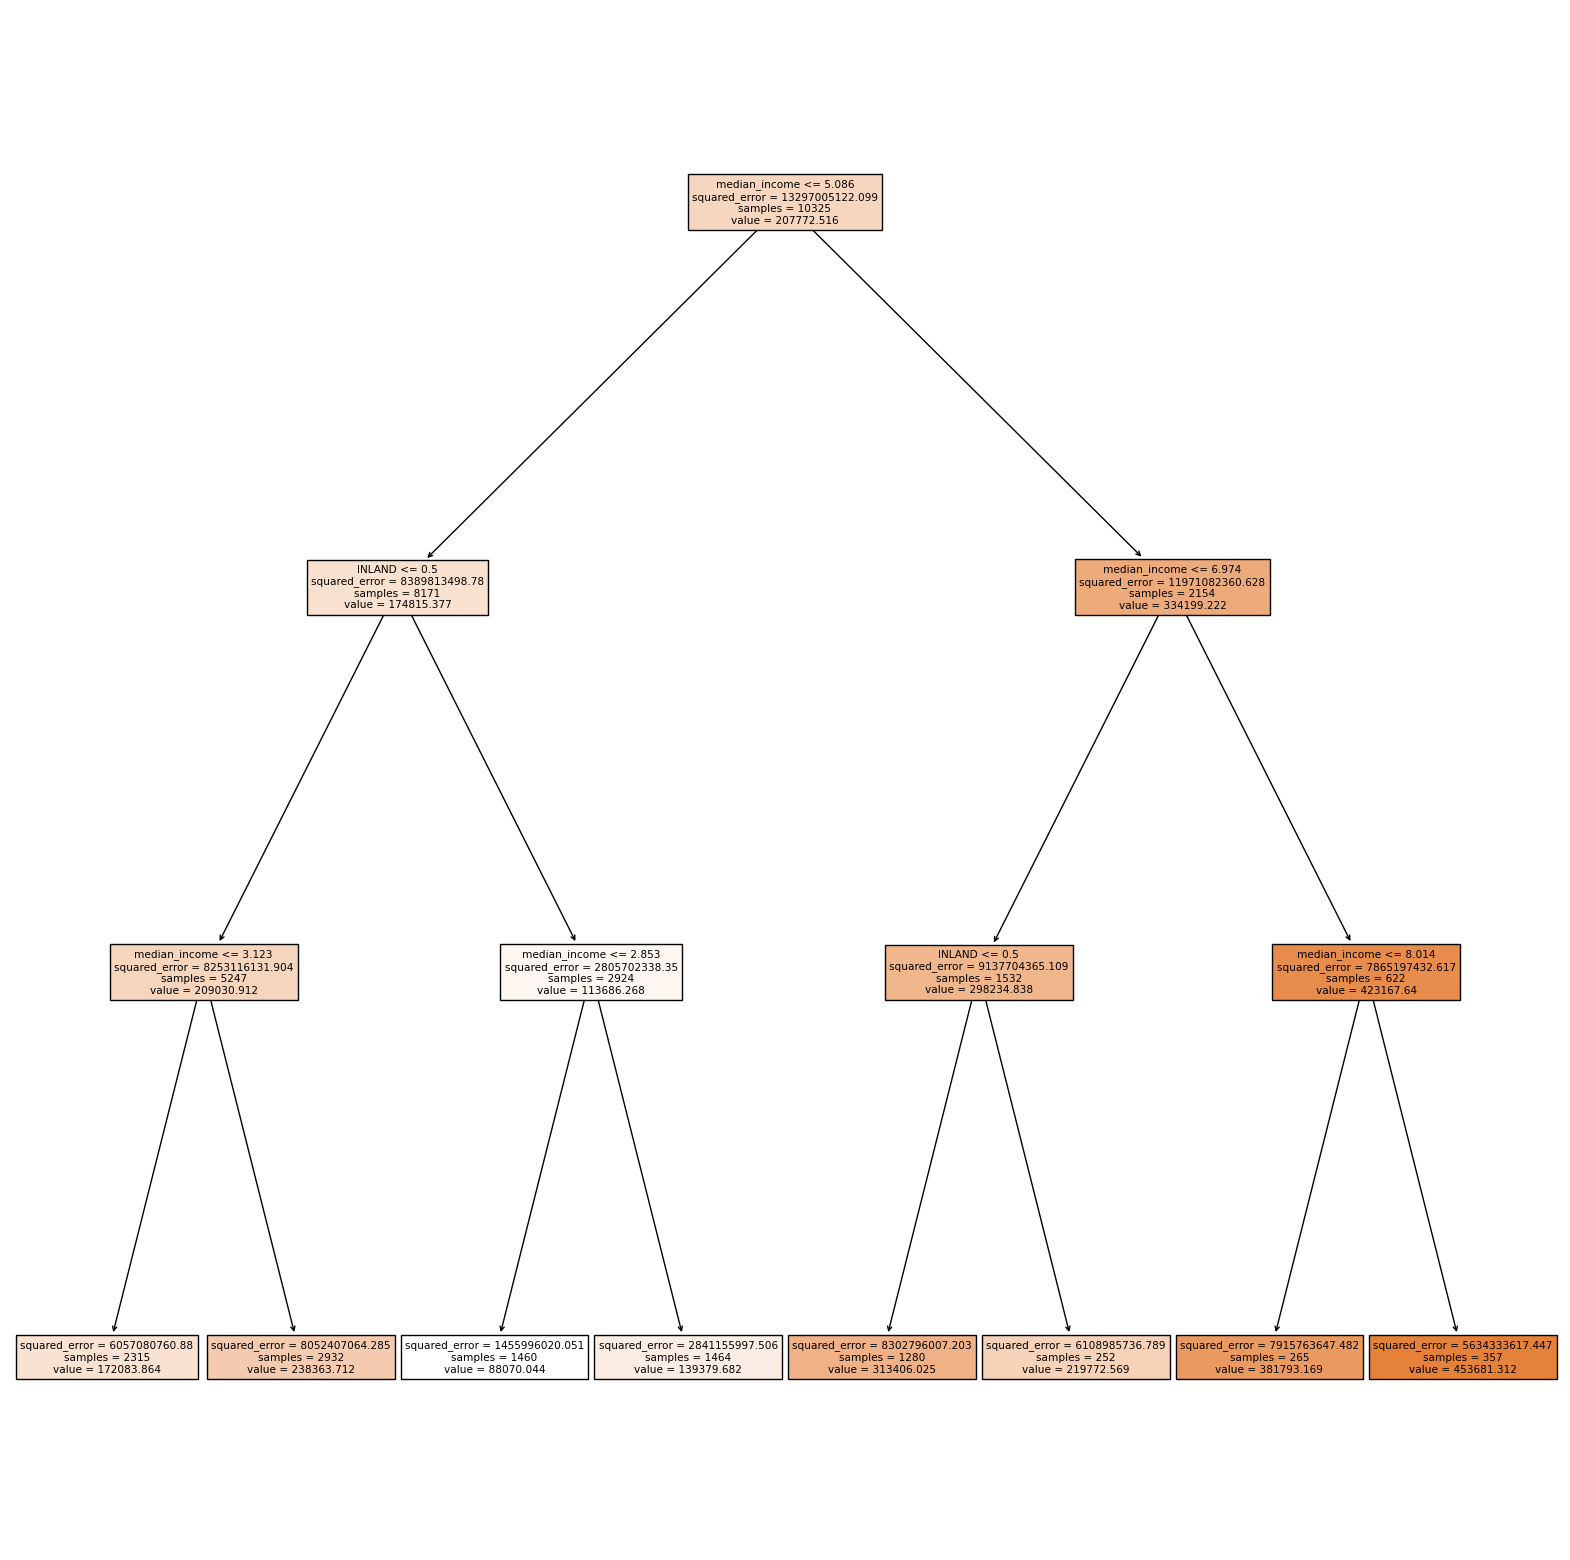

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)